In [3]:
import pandas as pd
import dask.dataframe as dd #https://medium.com/analytics-vidhya/optimized-ways-to-read-large-csvs-in-python-ab2b36a7914e
                            #READ ABOUT DASK
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
#Read the dataset extensions
#df1 = dd.read_csv("steam_reviews_bonus_1.csv") #engine='python')
#df2 = dd.read_csv("steam_reviews_bonus_2.csv") #engine='python')

In [5]:
#Add them to the original dataset
#df1.to_csv("steam_reviews.csv", mode="a", header=None, index=False)
#df2.to_csv("steam_reviews.csv", mode="a", header=None, index=False)

In [6]:
#Import the extended dataset
#df = dd.read_csv('steam_reviews.csv', engine='python', usecols= ["app_id","review", "weighted_vote_score", "steam_purchase", "received_for_free"])

In [7]:
#import the WHOLE dataset
#df = pd.DataFrame()
#for chunk in pd.read_csv("steam_reviews.csv", chunksize=100_000):
#    print("\r"+str(len(df)), end="")
#    df = pd.concat([df, chunk], ignore_index=True)

In [8]:
#for now work on 0.1% of the dataset
import random
p=0.001
df = pd.read_csv("steam_reviews.csv", header=0, skiprows=lambda i: i>0 and random.random() > p)

# RQ1 Exploratory Data Analysis (EDA)

In [9]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21664 entries, 0 to 21663
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      21664 non-null  int64  
 1   app_id                          21664 non-null  int64  
 2   app_name                        21664 non-null  object 
 3   review_id                       21664 non-null  int64  
 4   language                        21664 non-null  object 
 5   review                          21626 non-null  object 
 6   timestamp_created               21664 non-null  int64  
 7   timestamp_updated               21664 non-null  int64  
 8   recommended                     21664 non-null  bool   
 9   votes_helpful                   21664 non-null  int64  
 10  votes_funny                     21664 non-null  int64  
 11  weighted_vote_score             21664 non-null  float64
 12  comment_count                   

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,63,292030,The Witcher 3: Wild Hunt,85168022,polish,kox,1611353906,1611353906,True,0,...,True,False,False,76561198308507040,43,2,4623.0,580.0,4623.0,1.611354e+09
1,366,292030,The Witcher 3: Wild Hunt,85110723,latam,ta bueno porque tiene sexoooooooooo,1611266540,1611266540,True,0,...,True,False,False,76561198811304007,20,7,6940.0,123.0,6940.0,1.610223e+09
2,610,292030,The Witcher 3: Wild Hunt,85062854,english,GOOD,1611192417,1611192417,True,0,...,False,False,False,76561198967696056,24,2,3854.0,996.0,3218.0,1.611295e+09
3,1577,292030,The Witcher 3: Wild Hunt,84874702,brazilian,bão dms,1610918127,1610918127,True,0,...,True,False,False,76561198128001295,27,6,10851.0,3742.0,9273.0,1.611335e+09
4,2237,292030,The Witcher 3: Wild Hunt,84764459,english,it SOOO GUD,1610766440,1610766440,True,0,...,True,False,False,76561198368553291,224,25,238.0,162.0,238.0,1.610766e+09


In [10]:
#df.duplicated() #Returns a boolean Series denoting duplicate rows
#index=0
#for i in df.duplicated():
#    if i==True: print(index, "is duplicated")
#    index+=1

In [11]:
df.memory_usage( )

Index                                128
Unnamed: 0                        173312
app_id                            173312
app_name                          173312
review_id                         173312
language                          173312
review                            173312
timestamp_created                 173312
timestamp_updated                 173312
recommended                        21664
votes_helpful                     173312
votes_funny                       173312
weighted_vote_score               173312
comment_count                     173312
steam_purchase                     21664
received_for_free                  21664
written_during_early_access        21664
author.steamid                    173312
author.num_games_owned            173312
author.num_reviews                173312
author.playtime_forever           173312
author.playtime_last_two_weeks    173312
author.playtime_at_review         173312
author.last_played                173312
dtype: int64

In [12]:
df.isnull().sum()

Unnamed: 0                         0
app_id                             0
app_name                           0
review_id                          0
language                           0
review                            38
timestamp_created                  0
timestamp_updated                  0
recommended                        0
votes_helpful                      0
votes_funny                        0
weighted_vote_score                0
comment_count                      0
steam_purchase                     0
received_for_free                  0
written_during_early_access        0
author.steamid                     0
author.num_games_owned             0
author.num_reviews                 0
author.playtime_forever            0
author.playtime_last_two_weeks     0
author.playtime_at_review         22
author.last_played                 0
dtype: int64

<AxesSubplot:>

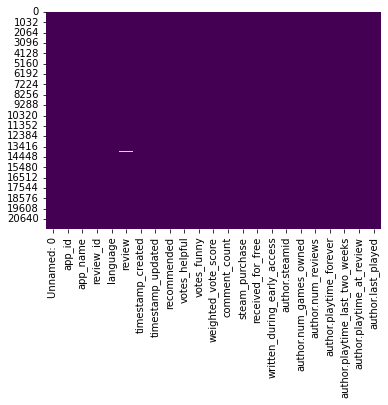

In [13]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

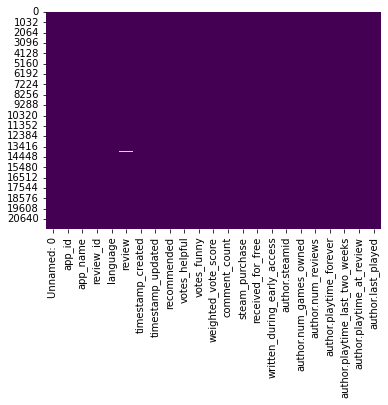

In [14]:
#Replace null values with mean of the column
df["author.playtime_at_review"]=pd.to_numeric(df["author.playtime_at_review"])
df["author.playtime_at_review"].fillna(df["author.playtime_at_review"].mean(), inplace=True)
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

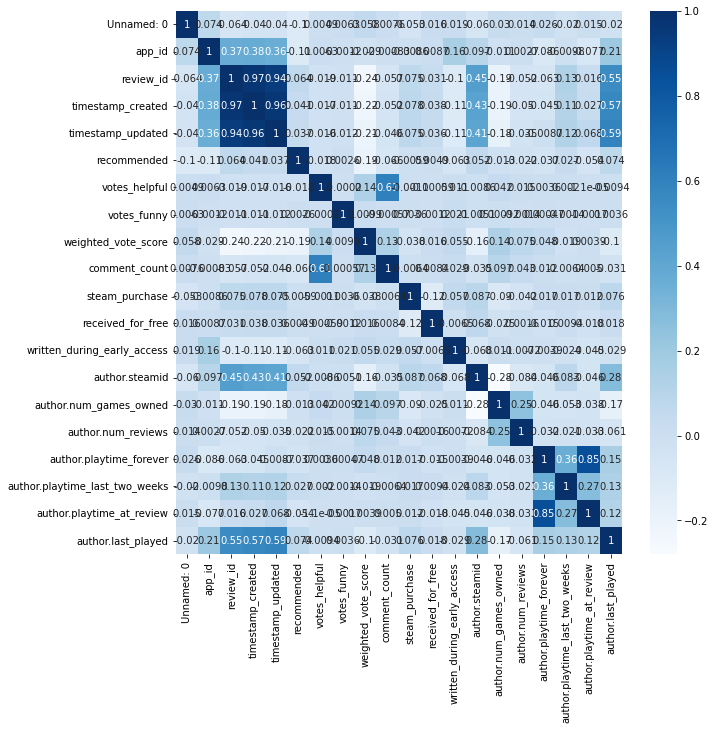

In [15]:
#Visualize how related are the entries
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'timestamp_updated')

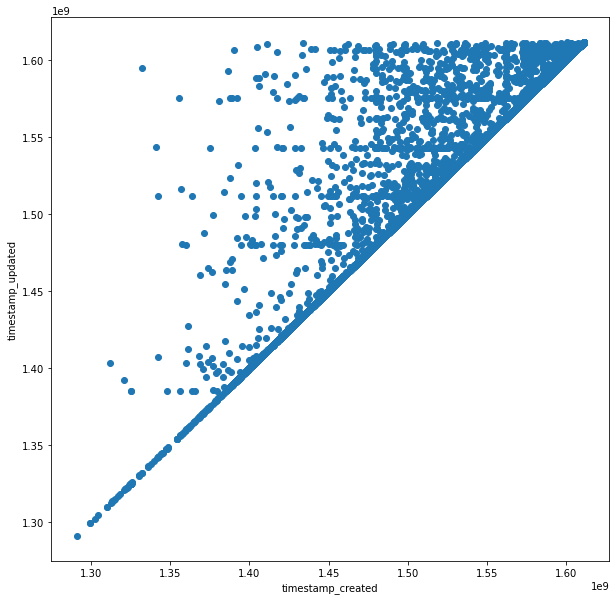

In [16]:
#we notice a high correlation between timestamp updated and created--->
#--->compare timestamp created vs updated
plt.figure(figsize=(10,10))
plt.scatter(x='timestamp_created',y='timestamp_updated',data=df)
plt.xlabel('timestamp_created')
plt.ylabel('timestamp_updated')

# RQ2

### Plot the number of reviews for each application in descending order

In [17]:
s=df["app_name"].value_counts()
percent=1/100*df.shape[0]
s=s.groupby(np.where(s>=percent,s.index,'other games')).sum()
s=s.sort_values(axis=0, ascending=False, ignore_index=False)

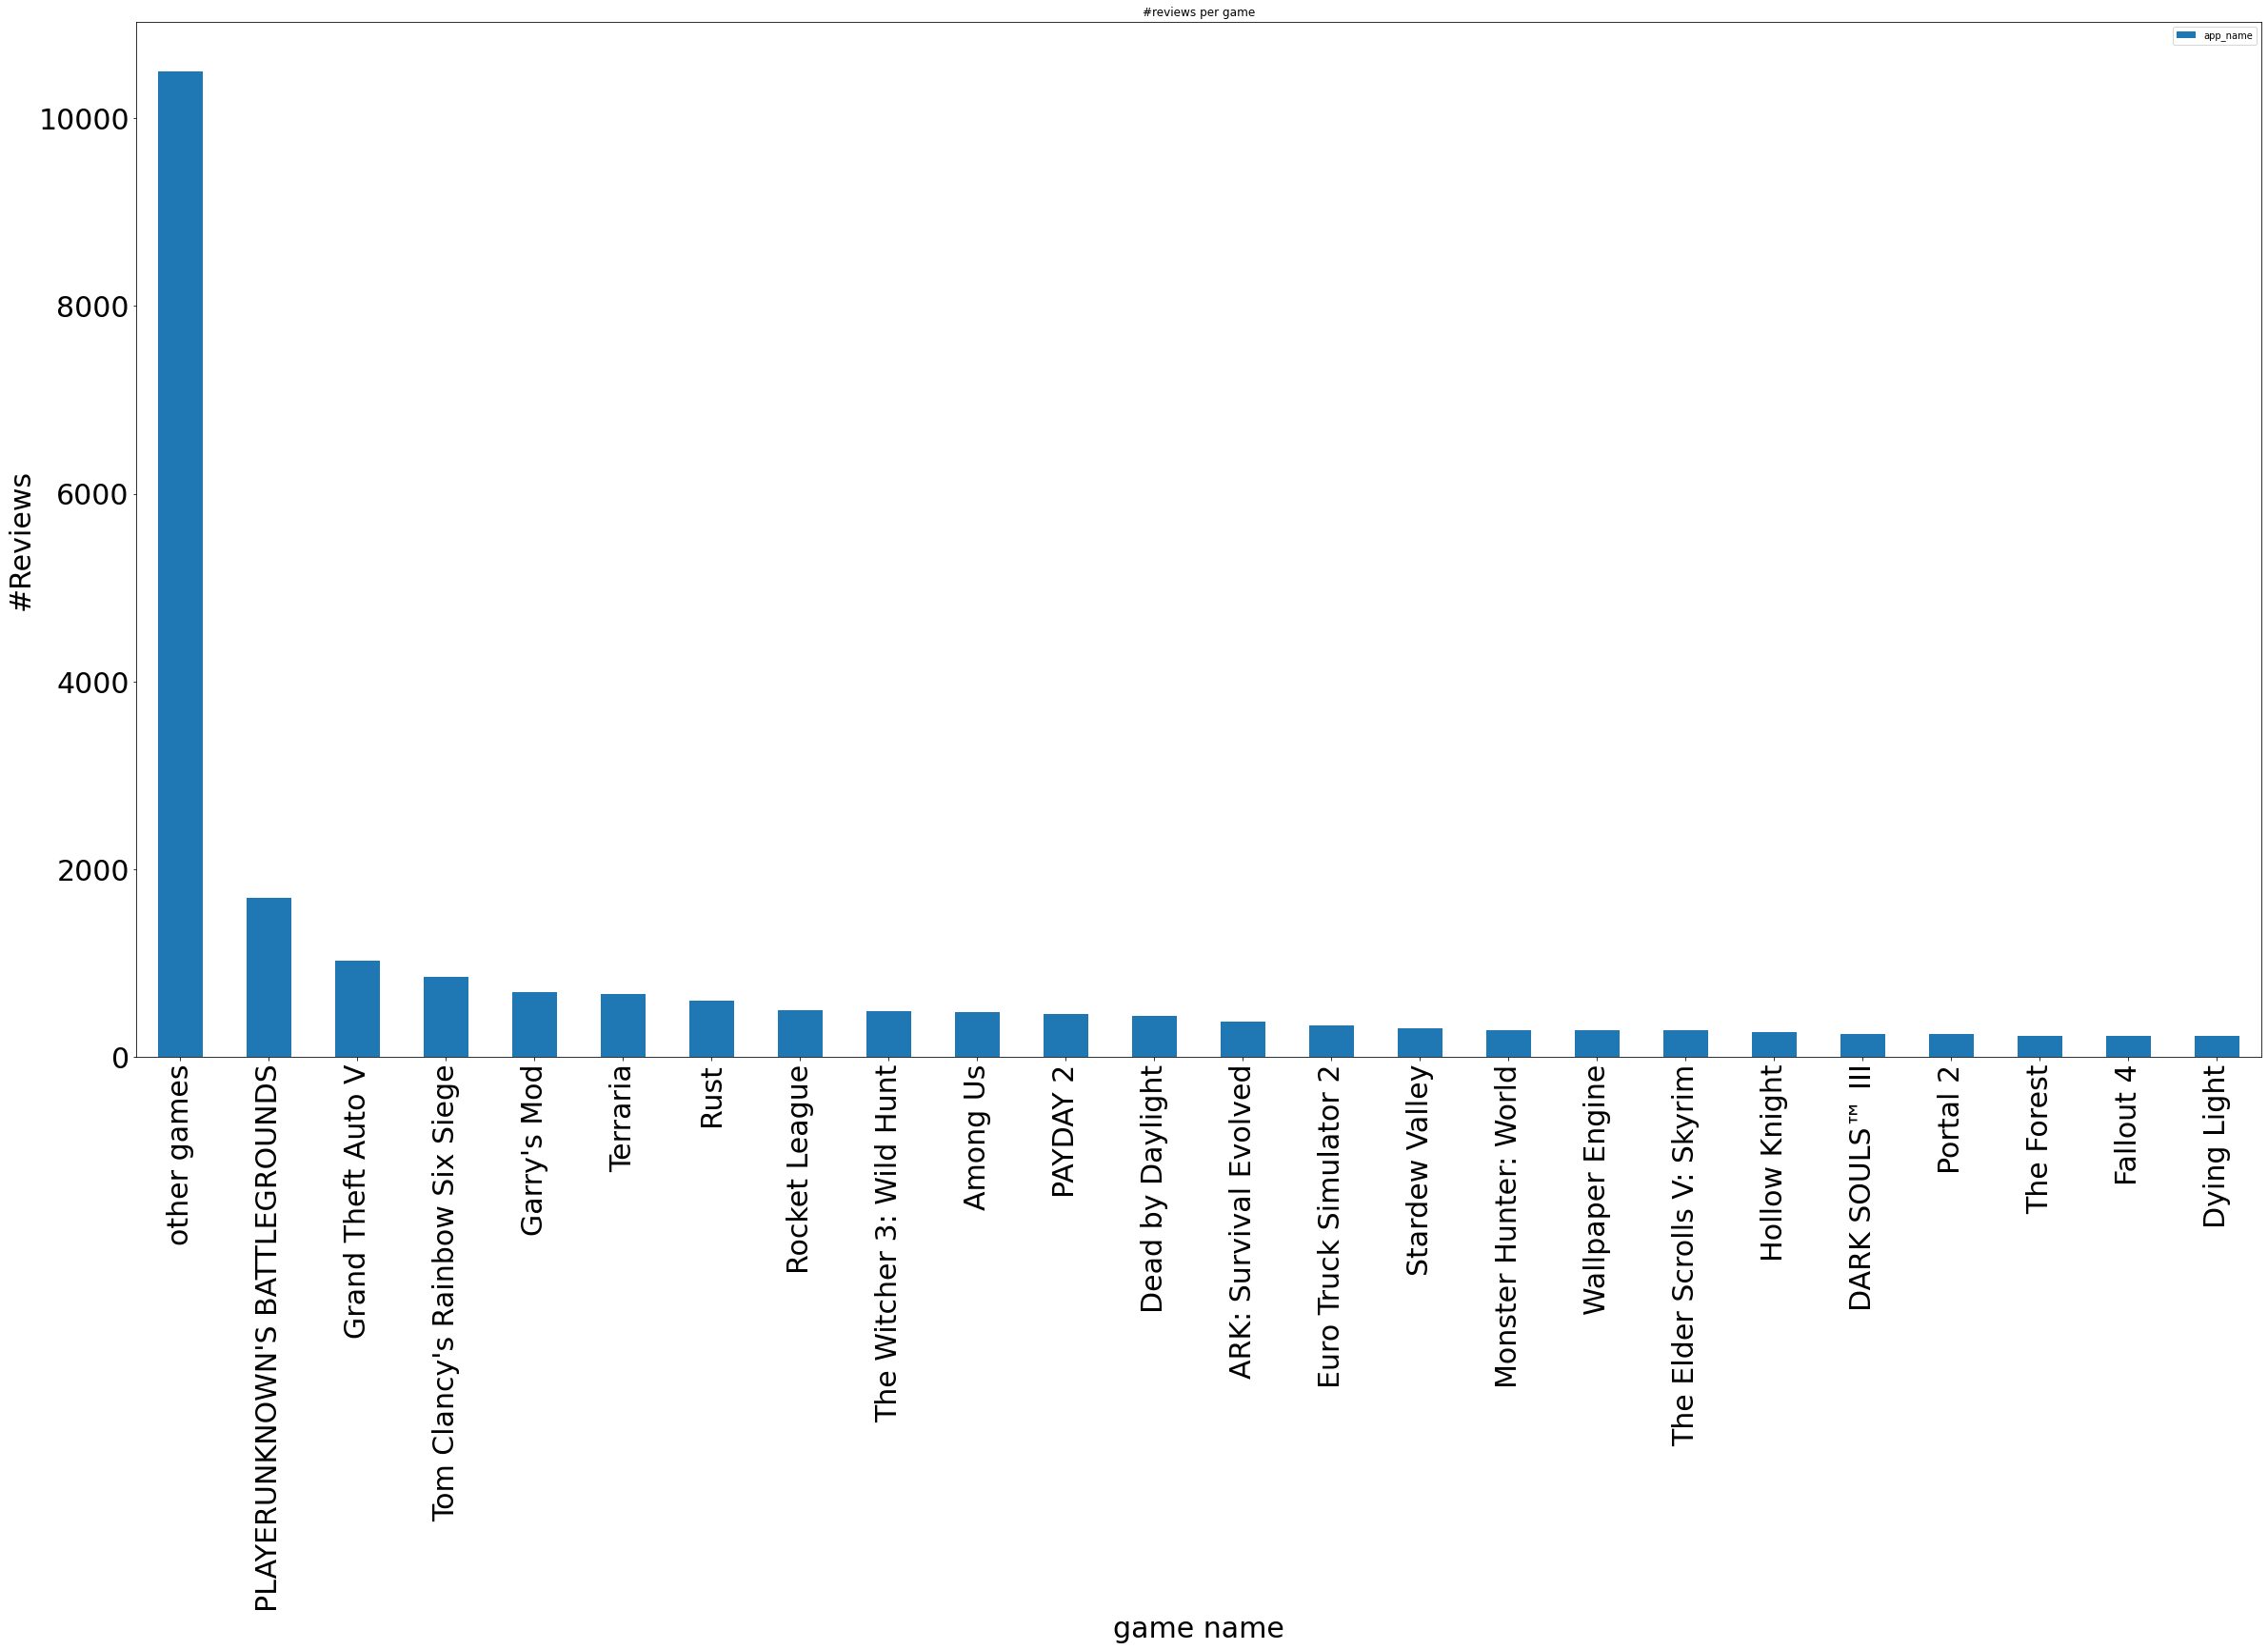

In [18]:
#We opted for grouping all the games with a low number of reviews into a single column
ax=s.plot(kind='bar', title ="#reviews per game", figsize=(40,20), legend=True, fontsize=30)
ax.set_xlabel("game name", fontsize=30)
ax.set_ylabel("#Reviews", fontsize=30)
plt.show()

### What applications have the best Weighted Vote Score?

In [19]:
#It's not clear whether we have to take the games with the highest weighted score or do some sort of operation for every game (like a mean) 
#and then take the ones with the highest values -----> we'll implement both approaches

In [20]:
#Here we just pick the 10 games with the highest absolute score
df[["app_name", "weighted_vote_score"]].nlargest(10, "weighted_vote_score")

,app_name,weighted_vote_score
4483,Euro Truck Simulator 2,0.989907
4684,Wallpaper Engine,0.988828
16137,Stellaris,0.977437
8956,Doki Doki Literature Club,0.973443
2333,Sid Meier's Civilization VI,0.961202
16005,Cities: Skylines,0.958547
2521,Subnautica,0.958291
8109,Raft,0.951651
3325,NBA 2K19,0.944636
3169,PC Building Simulator,0.926381


In [21]:
#MEAN METHOD 
app_vote_mean = df[["app_name", "weighted_vote_score"]].groupby('app_name').mean()
app_vote_mean.nlargest(10, "weighted_vote_score")

,weighted_vote_score
app_name,
Neon Hardcorps,0.680880
Volgarr the Viking,0.615954
Rise of Industry,0.552171
Fishing: Barents Sea,0.551549
Rapture Rejects,0.547368
Shadow Complex Remastered,0.545880
Cold Waters,0.541985
WWE 2K20,0.528311
Guacamelee! Super Turbo Championship Edition,0.528114


### Which applications have the most and the least recommendations? How many of these applications were purchased, and how many were given for free?

In [22]:
#the 2 questions are done together
rec=df.loc[:,["app_name","recommended","steam_purchase", "received_for_free"]] 

In [23]:
rec_count=rec.groupby("app_name").aggregate(sum)
rec_count

,recommended,steam_purchase,received_for_free
app_name,,,
20XX,4,3,0
A Hat in Time,42,38,1
A Short Hike,4,4,0
A Way Out,8,8,0
ARK: Survival Evolved,290,303,13
...,...,...,...
XCOM 2,55,48,0
Yakuza 0,28,26,0
Youtubers Life,7,10,1


<AxesSubplot:xlabel='app_name'>

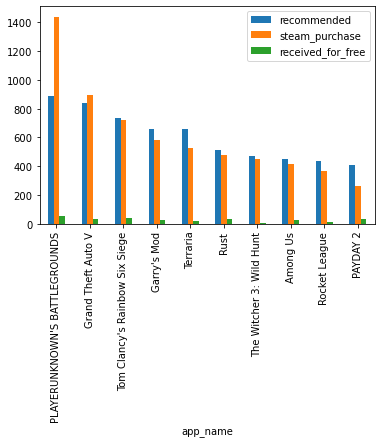

In [24]:
#Plot the ones with the highest number of recommendations
most_rec=rec_count.nlargest(10, "recommended")
most_rec.plot(kind='bar')

<AxesSubplot:xlabel='app_name'>

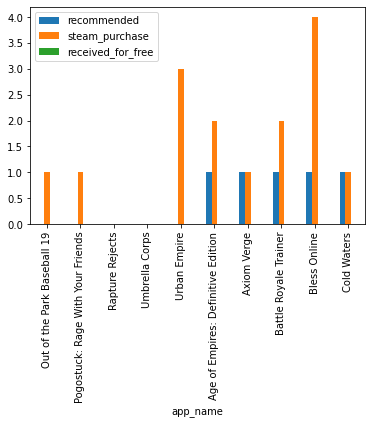

In [25]:
#Plot the ones with the lowest number of recommendations
least_rec=rec_count.nsmallest(10, "recommended")
least_rec.plot(kind='bar')

# TQ1

1.
The algorithm we are given computes
$$alg(A, k) =s \quad \text{such that}\quad \#\{A_i \leq s\} = k$$
where we denote with $A_i$ the i-th element of the array A of length $n$, with $k\,\epsilon\,[0,1]$ .
We can notice a certain similarity with the **Quantile Function**. In fact, given a random variable $X$ and a threshold $p$, the quantile function $Q:[0,1]\rightarrow\mathbb{R}$ computes 
$$Q(p) = s \quad \text{such that} \quad P(X \leq s) = p$$
Finally we can say that the algorithm we are given computes the value $s$ so that the number of elements in the array A smaller or equal to $s$ will be equal to $k$: it is a sort of quantile function.

2.
The running time of the algorithm in the worst case scenario is $\Theta(n)$: consider k=len(A)=n and the case where $s$ is equal to the first element of A for each iteration. Then the s satisfying the condition will be picked at the $(n-1)$-th iteration. From this we have the result of complexity equal to $\Theta(n)$ (not considering constants).

3.
The running time of the algorithm in the best case scenario is $\Theta(1)$: we will be picking the right $s$ right away (at the first try).

# RQ8

Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.



In [50]:
ff=pd.read_csv('steam_reviews.csv', usecols= ["weighted_vote_score", "timestamp_updated", "timestamp_created"])

In [75]:
tab=df.loc[:,["timestamp_created","timestamp_updated","weighted_vote_score"]] 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21664 entries, 0 to 21663
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      21664 non-null  int64  
 1   app_id                          21664 non-null  int64  
 2   app_name                        21664 non-null  object 
 3   review_id                       21664 non-null  int64  
 4   language                        21664 non-null  object 
 5   review                          21626 non-null  object 
 6   timestamp_created               21664 non-null  int64  
 7   timestamp_updated               21664 non-null  int64  
 8   recommended                     21664 non-null  bool   
 9   votes_helpful                   21664 non-null  int64  
 10  votes_funny                     21664 non-null  int64  
 11  weighted_vote_score             21664 non-null  float64
 12  comment_count                   

In [76]:
tab

,timestamp_created,timestamp_updated,weighted_vote_score
0,1611353906,1611353906,0.000000
1,1611266540,1611266540,0.000000
2,1611192417,1611192417,0.000000
3,1610918127,1610918127,0.000000
4,1610766440,1610766440,0.000000
...,...,...,...
21659,1585020051,1585100160,0.000000
21660,1585018419,1585018419,0.000000
21661,1585013698,1585013698,0.000000
21662,1585001570,1585001570,0.565217


In [77]:
#we observe that there are many rows with weight 0, we want to remove those
tab = tab[tab.weighted_vote_score != 0]
tab

,timestamp_created,timestamp_updated,weighted_vote_score
9,1610133901,1610133901,0.454545
13,1609792902,1609792902,0.523810
18,1609095431,1609095431,0.523810
28,1607635064,1607635064,0.523810
38,1606467791,1606467791,0.523810
...,...,...,...
21647,1585552117,1585552117,0.670983
21649,1585225440,1585226211,0.558890
21650,1585223836,1585223836,0.523810
21658,1585023607,1585023607,0.545455


In [78]:
#now it's time to convert the 2 timestamp columns into a readable way and do
#timestamp_updated - timestamp_created (it's the variable we care about!)

In [79]:
#tab["timestamp_diff"]=tab["timestamp_updated"] - tab["timestamp_created"]
tab=tab.assign(timestamp_diff = (tab.timestamp_updated-tab.timestamp_created)*1/(60*60*24)) #convert to days unit of meaasure
tab=tab.drop(columns=['timestamp_updated', 'timestamp_created'])

In [80]:
tab #We made it!

,weighted_vote_score,timestamp_diff
9,0.454545,0.000000
13,0.523810,0.000000
18,0.523810,0.000000
28,0.523810,0.000000
38,0.523810,0.000000
...,...,...
21647,0.670983,0.000000
21649,0.558890,0.008924
21650,0.523810,0.000000
21658,0.545455,0.000000


Text(0, 0.5, 'time diff [days]')

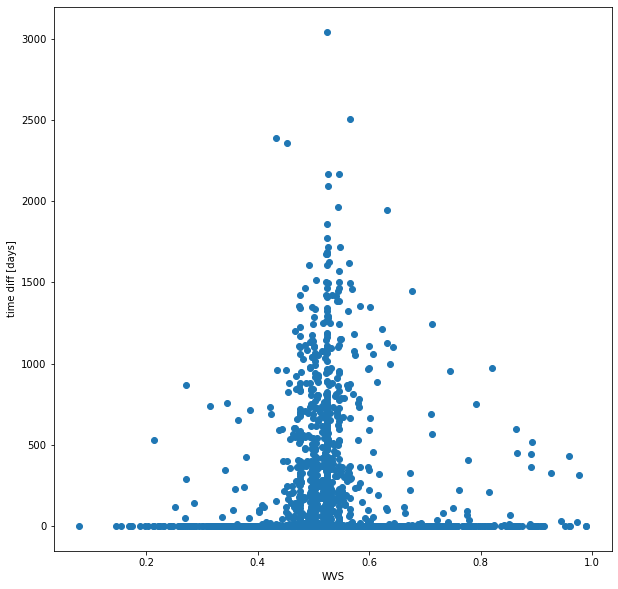

In [81]:
#it's time to plot and see what we have here before we start working on this data
plt.figure(figsize=(10,10))
plt.scatter(x='weighted_vote_score',y='timestamp_diff',data=tab)
plt.xlabel('WVS')
plt.ylabel('time diff [days]')

In [90]:
from scipy.optimize import curve_fit
from scipy.stats import t
def tt(x,n):
    return t.pdf(x,n)
def test(x, a, b):
    return a * np.sin(b * x)
def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)*2/(2*sigma*2))
def poli(x,a,b,c):
    return a+b*x+c*x*x
x0=tab["weighted_vote_score"].mean()
sigma=(tab["weighted_vote_score"].var())**(0.5)
x=tab["weighted_vote_score"]
y=tab["timestamp_diff"]

In [91]:
param, param_cov = curve_fit(tt, x, y)

In [92]:
param

array([5800.94559362])

In [93]:
param_cov

array([[3.68624293e+16]])

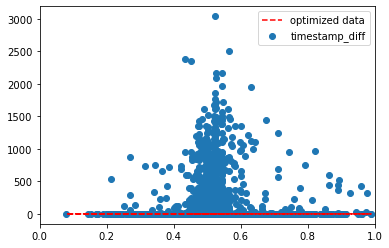

In [94]:
# ans stores the new y-data according to
# the coefficients given by curve-fit() function
#ans=param[0]+param[1]*x+param[2]*x*x
ans=t.pdf(x,param[0])
plt.scatter(x='weighted_vote_score',y='timestamp_diff',data=tab)
plt.plot(x, ans, '--', color ='red', label ="optimized data")
plt.xlim([0,1])
plt.legend()
plt.show()

In [95]:
tab["timestamp_diff"].value_counts()

0.000000       5858
0.000012          6
0.000417          4
0.001042          3
0.001238          3
               ... 
1067.962292       1
1.305799          1
0.001782          1
0.005625          1
0.008924          1
Name: timestamp_diff, Length: 1179, dtype: int64